# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [334]:
import importlib
from datetime import datetime, timedelta

import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot as plt

import util
import main

importlib.reload(util)
importlib.reload(main)

<module 'main' from '/Users/yaskovdev/dev/git_home/sandbox/service-instance-estimation/main.py'>

In [335]:
sessions = [
    (datetime(2024, 1, 1, 9, 0), datetime(2024, 1, 1, 9, 7)),
    (datetime(2024, 1, 1, 9, 3), datetime(2024, 1, 1, 9, 10)),
    (datetime(2024, 1, 1, 9, 9), datetime(2024, 1, 1, 9, 17)),
    (datetime(2024, 1, 1, 9, 6), datetime(2024, 1, 1, 9, 19)),
]

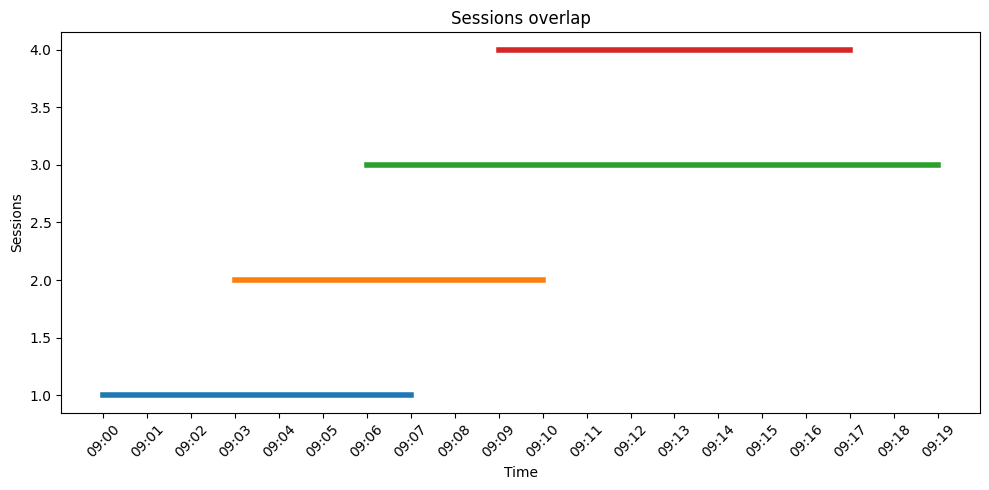

In [336]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, (start, end) in enumerate(sorted(sessions, key=lambda x: x[0])):
    ax.plot([start, end], [i + 1, i + 1], label=f"Session {i + 1}", linewidth=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.xticks(rotation=45)

ax.set_xlabel("Time")
ax.set_ylabel("Sessions")
ax.set_title("Sessions overlap")

plt.tight_layout()
plt.show()

In [337]:
total_composers = 2
composition_speed = 2
delay_threshold_s = timedelta(minutes=1).total_seconds()
delays_s = main.calculate_delays_s(sessions, total_composers, composition_speed)

delays_s_np = np.array(delays_s)
statistics = {
    "max_delay": delays_s_np.max(),
    "avg_delay": delays_s_np.mean(),
    "95th_percentile": np.percentile(delays_s_np, 95),
    "percent_under_threshold": (delays_s_np <= delay_threshold_s).mean() * 100,
    "delays": delays_s,
}

print(f"Delays in s: {delays_s}")

meets_sla = statistics['95th_percentile'] <= delay_threshold_s
status = "✅ OK" if meets_sla else "❌ FAIL"

print(f"{total_composers} instances: "
      f"Avg delay = {statistics['avg_delay']:.1f} s, "
      f"95th = {statistics['95th_percentile']:.1f} s, "
      f"→ {status}")


Delays in s: [0.0, 0.0, 0.0, 0.0]
2 instances: Avg delay = 0.0 s, 95th = 0.0 s, → ✅ OK
